In [1]:
%pylab inline
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


In [165]:
import numpy as np 
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
from scipy.stats import norm

import math
from ctypes import *
import sys
import string

In [166]:
review_df = pd.read_csv('2015 CHR Analytic Data.csv')
len(review_df)

3191

In [167]:
#Step 1

df = review_df # Store in dummy variable
df['2011 population estimate Value'] = df["2011 population estimate Value"].str.replace(',','')
df['2011 population estimate Value'] = df['2011 population estimate Value'].astype(float)
df = df.drop(df[df['2011 population estimate Value'] < 30000].index) # Drop all < 30000
#print len(df)

#Step 2
for column_name, column in df.transpose().iterrows():
    if(column_name!='COUNTYCODE' and column_name.find("Value",(len(column_name)-5))==-1):
        df = df.drop(column_name, 1)
#print len(df)


#Step3

df= df.dropna()

#Delete all total rows

df.dropna() #Drop all rows having any Nan
df = df.drop(df[df['COUNTYCODE'] == 0].index)
print "1. TOTAL NUMBER OF COUNTIES: ",len(df)




1. TOTAL NUMBER OF COUNTIES:  823


2. log_paamv HISTOGRAM: 2histogram.png


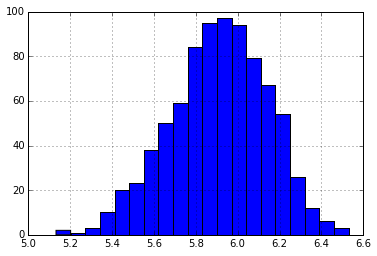

In [205]:
df['log_paamv'] = df['Premature age-adjusted mortality Value']

df['log_paamv']=np.log(df['log_paamv'])
df['log_paamv'].hist(bins=20)
print "2. log_paamv HISTOGRAM: 2histogram.png"

In [182]:
from sklearn import datasets, linear_model

#Shuffle Indexes
df = df.reindex(np.random.permutation(df.index))
#print df.head()

REMOVED_COLUMNS = ['COUNTYCODE', 'log_paamv', 'Premature age-adjusted mortality Value','Premature death Value', 'Uninsured adults Value', 'Teen births Value', 'Food insecurity Value', 'Physical inactivity Value', 'Adult smoking Value', 'Injury deaths Value', 'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value', 'Child mortality Value', 'Uninsured Value']
lr_df = df.copy()

for col_name in REMOVED_COLUMNS:
    #print col_name
    lr_df = lr_df.drop(col_name, 1)
lr_df.head()

for c in lr_df.columns:
    if not (lr_df[c].dtype == np.float64 or lr_df[c].dtype == np.int64):
        lr_df[c] = lr_df[c].apply(lambda val: float(string.replace(str(val),',',''))) ##change to string then floats... 
        lr_df[c] = lr_df[c].astype('float')


#Standardize

regr = linear_model.LinearRegression()

gMAE = 0.0
for j in range(0, 10):
    
    to_be_skipped_from = int( (j*len(lr_df))/10 )
    to_be_skipped = int(len(lr_df)/10)+1
    
    train_x = lr_df[0:to_be_skipped_from].copy()
    train_y = df['log_paamv'][0:to_be_skipped_from].copy()
    
    train_x = train_x.append(lr_df[to_be_skipped_from+to_be_skipped:len(lr_df)+1].copy())
    train_y = train_y.append(df['log_paamv'][to_be_skipped_from+to_be_skipped:len(lr_df)+1].copy())
    
    test_x = lr_df[to_be_skipped_from:to_be_skipped_from+to_be_skipped].copy()
    test_y = df['log_paamv'][to_be_skipped_from:to_be_skipped_from+to_be_skipped].copy()
    
    for c in train_x.columns:
        train_x[c] = (train_x[c] - np.mean(train_x[c]))/np.std(train_x[c])
    
    train_y = (train_y - np.mean(train_y))/np.std(train_y)
        
    for c in test_x.columns:
        test_x[c] = (test_x[c] - np.mean(test_x[c]))/np.std(test_x[c])
        
    test_y = (test_y - np.mean(test_y))/np.std(test_y)
    
    #print 'train_x',0,to_be_skipped_from
    #print 'train_x append',to_be_skipped_from+to_be_skipped,len(lr_df)+1
    #print 'test_x',to_be_skipped_from,to_be_skipped_from+to_be_skipped
    
    regr.fit(train_x, train_y)

    # The coefficients
    #print("Residual sum of squares:",np.mean((regr.predict(test_x) - test_y) ** 2))
    gMAE += np.mean((regr.predict(test_x) - test_y) ** 2)

gMAE = gMAE/10

print "3. Non-regularized Linear Regression MSE: ", gMAE

3. Non-regularized Linear Regression MSE:  0.124838899866


In [203]:
#Part 4

from sklearn.decomposition import PCA

#Standardize dataset
for c in lr_df.columns:
    lr_df[c] = (lr_df[c] - np.mean(lr_df[c]))/np.std(lr_df[c])
    
pca = PCA(n_components=3)
pca.fit(lr_df)
print "4. Percentage variance explained of first three components:", pca.explained_variance_ratio_

4. Percentage variance explained of first three components: [ 0.28090638  0.13937027  0.0792126 ]


In [199]:
#Part 5 a)
#PCA
from sklearn import datasets, linear_model

#Shuffle Indexes
df = df.reindex(np.random.permutation(df.index))
#print df.head()

lr_df = df.copy()
#Standardize

for col_name in REMOVED_COLUMNS:
    #print col_name
    lr_df = lr_df.drop(col_name, 1)
lr_df.head()

for c in lr_df.columns:
    if not (lr_df[c].dtype == np.float64 or lr_df[c].dtype == np.int64):
        lr_df[c] = lr_df[c].apply(lambda val: float(string.replace(str(val),',',''))) ##change to string then floats... 
        lr_df[c] = lr_df[c].astype('float')



regr = linear_model.LinearRegression()
gMAE = 0.0


for j in range(0, 10):
    
    to_be_skipped_from = int( (j*len(lr_df))/10 )
    to_be_skipped = int(2*len(lr_df)/10)+1
    
    if j < 9:
        train_x = lr_df[0:to_be_skipped_from].copy()
        train_y = df['log_paamv'][0:to_be_skipped_from].copy()

        train_x = train_x.append(lr_df[to_be_skipped_from+to_be_skipped:len(lr_df)+1].copy())
        train_y = train_y.append(df['log_paamv'][to_be_skipped_from+to_be_skipped:len(lr_df)+1].copy())

        test_x = lr_df[to_be_skipped_from:to_be_skipped_from+to_be_skipped/2].copy()
        test_y = df['log_paamv'][to_be_skipped_from:to_be_skipped_from+to_be_skipped/2].copy()

        dev_x = lr_df[to_be_skipped_from+to_be_skipped/2:to_be_skipped_from+to_be_skipped].copy()
        dev_y = df['log_paamv'][to_be_skipped_from+to_be_skipped/2:to_be_skipped_from+to_be_skipped].copy()

    else:
        to_be_skipped = int(len(lr_df)/10)+1
        train_x = lr_df[to_be_skipped+1:len(lr_df)-to_be_skipped].copy()
        train_y = df['log_paamv'][to_be_skipped+1:len(lr_df)-to_be_skipped].copy()

        test_x = lr_df[len(lr_df)-to_be_skipped+1:len(lr_df)].copy()
        test_y = df['log_paamv'][len(lr_df)-to_be_skipped+1:len(lr_df)].copy()

        dev_x = lr_df[0:to_be_skipped].copy()
        dev_y = df['log_paamv'][0:to_be_skipped].copy()
    
    for c in train_x.columns:
        train_x[c] = (train_x[c] - np.mean(train_x[c]))/np.std(train_x[c])
    
    train_y = (train_y - np.mean(train_y))/np.std(train_y)
        
    for c in test_x.columns:
        test_x[c] = (test_x[c] - np.mean(test_x[c]))/np.std(test_x[c])
        
    test_y = (test_y - np.mean(test_y))/np.std(test_y)
    
    for c in dev_x.columns:
        dev_x[c] = (dev_x[c] - np.mean(dev_x[c]))/np.std(dev_x[c])
        
    dev_y = (dev_y - np.mean(dev_y))/np.std(dev_y)
    
    #print 'train_x',0,to_be_skipped_from
    #print 'train_x append',to_be_skipped_from+to_be_skipped,len(lr_df)+1
    #print 'test_x',to_be_skipped_from,to_be_skipped_from+to_be_skipped
    min_error = 10000;
    min_comp = 1
    for k in range(3,44):
        pca = PCA(n_components=k)
        pca.fit(train_x)
        Z = pca.transform(train_x)
        Z =  pd.DataFrame(Z).copy()
        dev_min = pca.transform(dev_x)
        dev_min =  pd.DataFrame(dev_min).copy()
        #print 'Z: ', len(Z),' train_y', len(train_y),' train_x', len(train_x)
        #print 'dev_x', len(dev_x),' dev_y', len(dev_y)
        regr.fit(Z, train_y)
        error = np.mean((regr.predict(dev_min) - dev_y) ** 2)
        if error < min_error:
            min_comp = k
            min_error = error
    #print 'iter ',j
    #print 'min components', min_comp
    pca = PCA(n_components=min_comp)
    pca.fit(train_x)
    Z = pca.transform(train_x)      
    Z =  pd.DataFrame(Z).copy()
    test_x = pca.transform(test_x)
    test_x =  pd.DataFrame(test_x).copy()
    regr.fit(Z, train_y)
    gMAE += np.mean((regr.predict(test_x) - test_y) ** 2)

gMAE = gMAE/10

print "5. a) principal components regression mse: ", gMAE

5. a) principal components regression mse:  0.126886957947


In [201]:
#Part 5 b)
#L2 Regularization

from sklearn.linear_model import Ridge, Lasso

#Shuffle Indexes
df = df.reindex(np.random.permutation(df.index))
#print df.head()

lr_df = df.copy()
#Standardize

for col_name in REMOVED_COLUMNS:
    #print col_name
    lr_df = lr_df.drop(col_name, 1)
lr_df.head()

for c in lr_df.columns:
    if not (lr_df[c].dtype == np.float64 or lr_df[c].dtype == np.int64):
        lr_df[c] = lr_df[c].apply(lambda val: float(string.replace(str(val),',',''))) ##change to string then floats... 
        lr_df[c] = lr_df[c].astype('float')

gMAE = 0.0


for j in range(0, 10):
    
    to_be_skipped_from = int( (j*len(lr_df))/10 )
    to_be_skipped = int(2*len(lr_df)/10)+1
    
    if j < 9:
        train_x = lr_df[0:to_be_skipped_from].copy()
        train_y = df['log_paamv'][0:to_be_skipped_from].copy()

        train_x = train_x.append(lr_df[to_be_skipped_from+to_be_skipped:len(lr_df)+1].copy())
        train_y = train_y.append(df['log_paamv'][to_be_skipped_from+to_be_skipped:len(lr_df)+1].copy())

        test_x = lr_df[to_be_skipped_from:to_be_skipped_from+to_be_skipped/2].copy()
        test_y = df['log_paamv'][to_be_skipped_from:to_be_skipped_from+to_be_skipped/2].copy()

        dev_x = lr_df[to_be_skipped_from+to_be_skipped/2:to_be_skipped_from+to_be_skipped].copy()
        dev_y = df['log_paamv'][to_be_skipped_from+to_be_skipped/2:to_be_skipped_from+to_be_skipped].copy()

    else:
        to_be_skipped = int(len(lr_df)/10)+1
        train_x = lr_df[to_be_skipped+1:len(lr_df)-to_be_skipped].copy()
        train_y = df['log_paamv'][to_be_skipped+1:len(lr_df)-to_be_skipped].copy()

        test_x = lr_df[len(lr_df)-to_be_skipped+1:len(lr_df)].copy()
        test_y = df['log_paamv'][len(lr_df)-to_be_skipped+1:len(lr_df)].copy()

        dev_x = lr_df[0:to_be_skipped].copy()
        dev_y = df['log_paamv'][0:to_be_skipped].copy()
    
    for c in train_x.columns:
        train_x[c] = (train_x[c] - np.mean(train_x[c]))/np.std(train_x[c])
    
    train_y = (train_y - np.mean(train_y))/np.std(train_y)
        
    for c in test_x.columns:
        test_x[c] = (test_x[c] - np.mean(test_x[c]))/np.std(test_x[c])
        
    test_y = (test_y - np.mean(test_y))/np.std(test_y)
    
    for c in dev_x.columns:
        dev_x[c] = (dev_x[c] - np.mean(dev_x[c]))/np.std(dev_x[c])
        
    dev_y = (dev_y - np.mean(dev_y))/np.std(dev_y)
    
    #print 'train_x',0,to_be_skipped_from
    #print 'train_x append',to_be_skipped_from+to_be_skipped,len(lr_df)+1
    #print 'test_x',to_be_skipped_from,to_be_skipped_from+to_be_skipped
    min_error = 10000;
    min_alpha = 1
    alphas = [pow(10,-5),pow(10,-4),pow(10,-3),pow(10,-2),pow(10,-1),1,10,100,1000,10000,100000,1000000]
    for alpha in alphas:
        regr = Ridge(alpha=alpha)
        regr.fit(train_x, train_y)
        error = np.mean((regr.predict(dev_x) - dev_y) ** 2)
        if error < min_error:
            min_alpha = alpha
            min_error = error
    #print 'iter ',j
    #print 'min alpha', min_alpha
    #print 'min error', min_error
    regr = Ridge(alpha=min_alpha)
    regr.fit(train_x, train_y)
    gMAE += np.mean((regr.predict(test_x) - test_y) ** 2)

gMAE = gMAE/10

print "5. b) L2 regularized mse: ", gMAE

5. b) L2 regularized mse:  0.12111448232


In [202]:
#Part 5 c)
#L1 Regularization

from sklearn.linear_model import Ridge, Lasso

#Shuffle Indexes
df = df.reindex(np.random.permutation(df.index))
#print df.head()

lr_df = df.copy()
#Standardize

for col_name in REMOVED_COLUMNS:
    #print col_name
    lr_df = lr_df.drop(col_name, 1)
lr_df.head()

for c in lr_df.columns:
    if not (lr_df[c].dtype == np.float64 or lr_df[c].dtype == np.int64):
        lr_df[c] = lr_df[c].apply(lambda val: float(string.replace(str(val),',',''))) ##change to string then floats... 
        lr_df[c] = lr_df[c].astype('float')


gMAE = 0.0


for j in range(0, 10):
    
    to_be_skipped_from = int( (j*len(lr_df))/10 )
    to_be_skipped = int(2*len(lr_df)/10)+1
    
    if j < 9:
        train_x = lr_df[0:to_be_skipped_from].copy()
        train_y = df['log_paamv'][0:to_be_skipped_from].copy()

        train_x = train_x.append(lr_df[to_be_skipped_from+to_be_skipped:len(lr_df)+1].copy())
        train_y = train_y.append(df['log_paamv'][to_be_skipped_from+to_be_skipped:len(lr_df)+1].copy())

        test_x = lr_df[to_be_skipped_from:to_be_skipped_from+to_be_skipped/2].copy()
        test_y = df['log_paamv'][to_be_skipped_from:to_be_skipped_from+to_be_skipped/2].copy()

        dev_x = lr_df[to_be_skipped_from+to_be_skipped/2:to_be_skipped_from+to_be_skipped].copy()
        dev_y = df['log_paamv'][to_be_skipped_from+to_be_skipped/2:to_be_skipped_from+to_be_skipped].copy()

    else:
        to_be_skipped = int(len(lr_df)/10)+1
        train_x = lr_df[to_be_skipped+1:len(lr_df)-to_be_skipped].copy()
        train_y = df['log_paamv'][to_be_skipped+1:len(lr_df)-to_be_skipped].copy()

        test_x = lr_df[len(lr_df)-to_be_skipped+1:len(lr_df)].copy()
        test_y = df['log_paamv'][len(lr_df)-to_be_skipped+1:len(lr_df)].copy()

        dev_x = lr_df[0:to_be_skipped].copy()
        dev_y = df['log_paamv'][0:to_be_skipped].copy()
    
    for c in train_x.columns:
        train_x[c] = (train_x[c] - np.mean(train_x[c]))/np.std(train_x[c])
    
    train_y = (train_y - np.mean(train_y))/np.std(train_y)
        
    for c in test_x.columns:
        test_x[c] = (test_x[c] - np.mean(test_x[c]))/np.std(test_x[c])
        
    test_y = (test_y - np.mean(test_y))/np.std(test_y)
    
    for c in dev_x.columns:
        dev_x[c] = (dev_x[c] - np.mean(dev_x[c]))/np.std(dev_x[c])
        
    dev_y = (dev_y - np.mean(dev_y))/np.std(dev_y)
    
    #print 'train_x',0,to_be_skipped_from
    #print 'train_x append',to_be_skipped_from+to_be_skipped,len(lr_df)+1
    #print 'test_x',to_be_skipped_from,to_be_skipped_from+to_be_skipped
    min_error = 10000;
    min_alpha = 1
    alphas = [pow(10,-5),pow(10,-4),pow(10,-3),pow(10,-2),pow(10,-1),1,10,100,1000,10000,100000]
    for alpha in alphas:
        regr = Lasso(alpha=alpha)
        regr.fit(train_x, train_y)
        error = np.mean((regr.predict(dev_x) - dev_y) ** 2)
        if error < min_error:
            min_alpha = alpha
            min_error = error
    #print 'iter ',j
    #print 'min alpha', min_alpha
    #print 'min error', min_error
    regr = Lasso(alpha=min_alpha)
    regr.fit(train_x, train_y)
    gMAE += np.mean((regr.predict(test_x) - test_y) ** 2)

gMAE = gMAE/10

print "5. c) L1 regularized mse: ", gMAE

5. b) L1 regularized mse:  0.122738420223
